=== Random Forest Results ===
Accuracy: 0.4430
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       0.00      0.00      0.00         2
           8       0.57      0.57      0.57         7
           9       0.00      0.00      0.00         6
          10       0.50      0.73      0.59        11
          11       0.60      0.60      0.60        10
          12       0.17      0.17      0.17         6
          13       0.25      0.17      0.20         6
          14       0.22      0.40      0.29         5
          15       0.30      0.43      0.35         7
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1
          18       1.00      0.50      0.67         2
          19       0.00      0.00      0.00         1

    accura

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

=== XGBoost Results ===
Accuracy: 0.4051
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         2
           8       0.29      0.29      0.29         7
           9       0.00      0.00      0.00         6
          10       0.46      0.55      0.50        11
          11       0.45      0.50      0.48        10
          12       0.00      0.00      0.00         6
          13       0.50      0.17      0.25         6
          14       0.25      0.60      0.35         5
          15       0.29      0.29      0.29         7
          16       0.50      0.33      0.40         3
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         1

    accuracy    

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

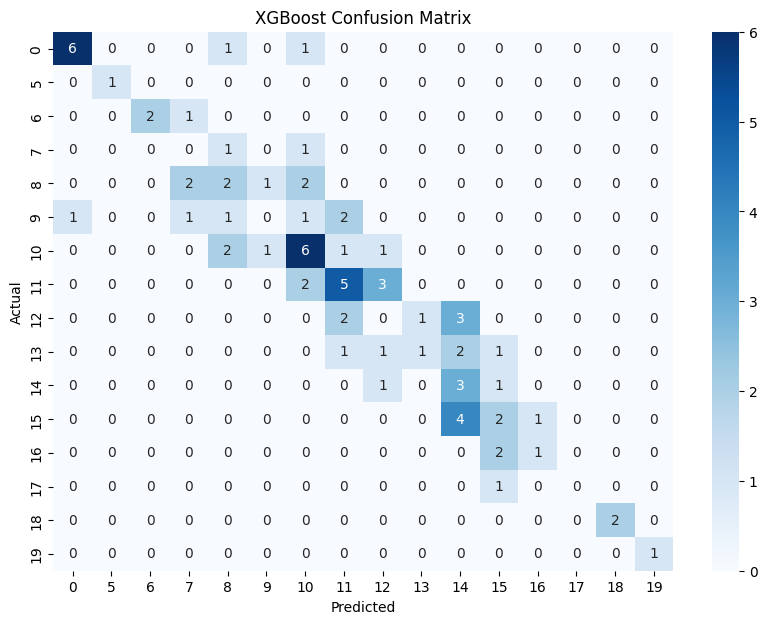

In [24]:
### importing libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Loading the encoded dataset.
df_encoded = pd.read_csv(r'c:\Users\HP\OneDrive\Desktop\Projects\Students-Performance-Predictor\Data\processed\student-mat-encoded.csv')

# Dropping rare classes with fewer than 5 samples.
class_counts = df_encoded['G3'].value_counts()
valid_classes = class_counts[class_counts >= 5].index
df_filtered = df_encoded[df_encoded['G3'].isin(valid_classes)]

# Splitting features and target.
X = df_filtered.drop('G3', axis=1)
y = df_filtered['G3']

# Encoding target labels for XGBoost.
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting into train and test sets.
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Also keeping original labels for Random Forest.
_, _, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, stratify=y_encoded, random_state=42
)


###RANDOM FOREST CLASSIFIER
# Training Random Forest model.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_orig)

# Predicting and evaluating the model.
rf_preds = rf_model.predict(X_test)
print("=== Random Forest Results ===")
print(f"Accuracy: {accuracy_score(y_test_orig, rf_preds):.4f}")
print("Classification Report:")
print(classification_report(y_test_orig, rf_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, rf_preds))
print("\n")


###XGBOOST CLASSIFIER
# Training XGBoost model.
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train_enc)

# Predicting and decoding labels.
xgb_preds_enc = xgb_model.predict(X_test)
xgb_preds = le.inverse_transform(xgb_preds_enc)
y_test_decoded = le.inverse_transform(y_test_enc)

# Evaluating the model.
print("=== XGBoost Results ===")
print(f"Accuracy: {accuracy_score(y_test_decoded, xgb_preds):.4f}")
print("Classification Report:")
print(classification_report(y_test_decoded, xgb_preds))
print("Confusion Matrix:")
print(confusion_matrix(y_test_decoded, xgb_preds))

# Visualizing Confusion Matrix.
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_decoded, xgb_preds),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
